In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/Tire class Classification/

/gdrive/MyDrive/Tire class Classification


In [4]:
ls

flat.class/  full.class/  no-tire.class/


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [6]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=30
CHANNELS=3

In [13]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/Tire class Classification",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 900 files belonging to 3 classes.


In [14]:
class_names = dataset.class_names
class_names

['flat.class', 'full.class', 'no-tire.class']

In [15]:
len(dataset)

15

In [16]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[ 93.        93.        93.      ]
  [ 93.        93.        93.      ]
  [ 93.84375   93.84375   93.84375 ]
  ...
  [ 43.        43.        43.      ]
  [ 43.        43.        43.      ]
  [ 43.        43.        43.      ]]

 [[ 96.625     96.625     96.625   ]
  [ 96.625     96.625     96.625   ]
  [ 96.7041    96.7041    96.7041  ]
  ...
  [ 43.        43.        43.      ]
  [ 43.        43.        43.      ]
  [ 43.        43.        43.      ]]

 [[102.0625   102.0625   102.0625  ]
  [101.29785  101.29785  101.29785 ]
  [100.506836 100.506836 100.506836]
  ...
  [ 43.        43.        43.      ]
  [ 43.        43.        43.      ]
  [ 43.        43.        43.      ]]

 ...

 [[209.       209.       209.      ]
  [205.375    205.375    205.375   ]
  [200.91309  200.91309  200.91309 ]
  ...
  [ 79.131836  79.131836  79.131836]
  [ 78.90625   78.90625   78.90625 ]
  [ 78.        78.        78.      ]]

 [[209.       209.       209.      ]
  [205.3

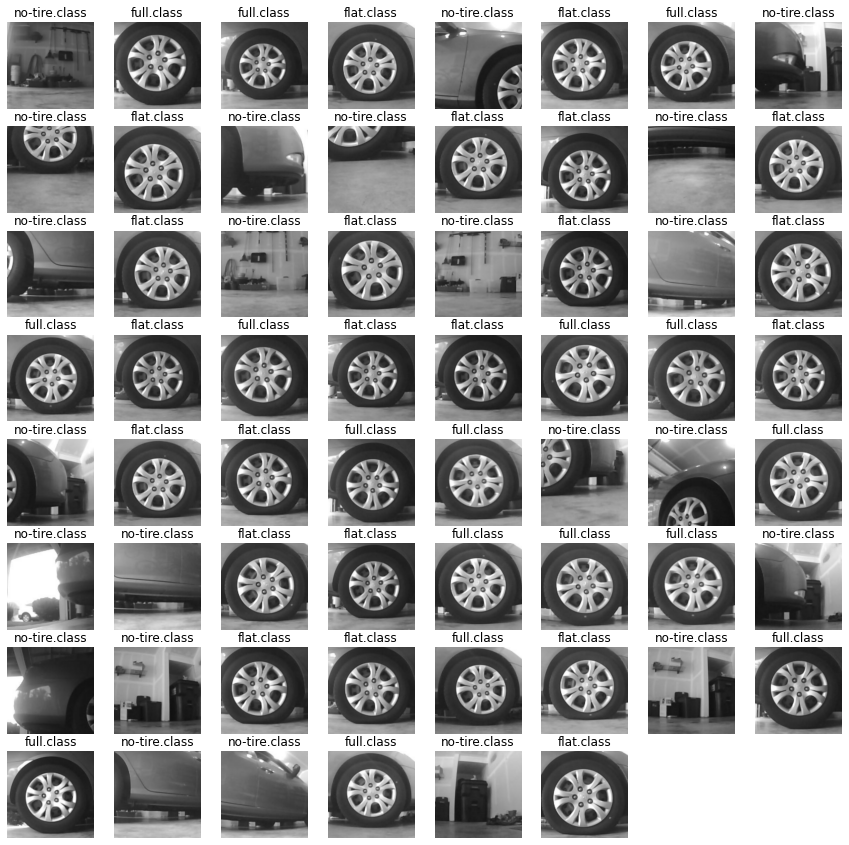

In [17]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [18]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [21]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [22]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [25]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/30
12/12 [==============================] - 110s 6s/step - loss: 1.4903 - accuracy: 0.3796 - val_loss: 0.9340 - val_accuracy: 0.5806
Epoch 2/30
12/12 [==============================] - 75s 6s/step - loss: 0.9828 - accuracy: 0.5252 - val_loss: 0.8125 - val_accuracy: 0.6935
Epoch 3/30
12/12 [==============================] - 81s 7s/step - loss: 0.6995 - accuracy: 0.6807 - val_loss: 0.5846 - val_accuracy: 0.6129
Epoch 4/30
12/12 [==============================] - 78s 6s/step - loss: 0.5036 - accuracy: 0.7031 - val_loss: 0.4563 - val_accuracy: 0.7581
Epoch 5/30
12/12 [==============================] - 78s 6s/step - loss: 0.3571 - accuracy: 0.8319 - val_loss: 0.3935 - val_accuracy: 0.7581
Epoch 6/30
12/12 [==============================] - 78s 7s/step - loss: 0.3445 - accuracy: 0.8263 - val_loss: 0.3821 - val_accuracy: 0.7419
Epoch 7/30
12/12 [==============================] - 78s 6s/step - loss: 0.2786 - accuracy: 0.8796 - val_loss: 0.1994 - val_accuracy: 0.9839
Epoch 8/30
12/12 [=

In [26]:
model.evaluate(test_ds)

2/2 [==============================] - 6s 2s/step - loss: 0.0028 - accuracy: 1.0000


[0.0027824395801872015, 1.0]

In [27]:
acc = history.history['accuracy']
loss = history.history['loss']

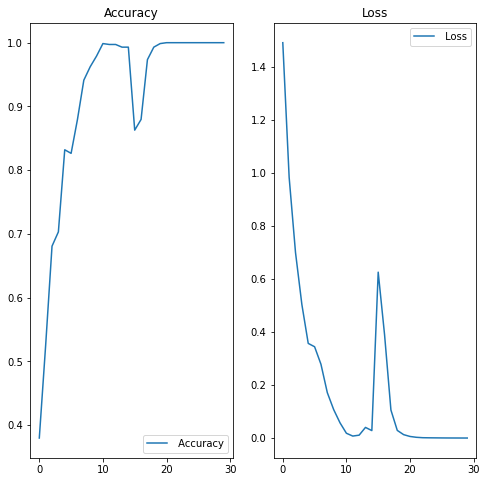

In [28]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

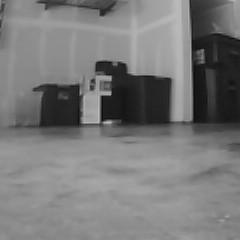

In [29]:
image_path = "/gdrive/My Drive/00298.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [30]:
pred = model.predict(scaled_img)

In [31]:
output = class_names[np.argmax(pred)]

In [32]:
output

'no-tire.class'

In [33]:
model.save("Tire class Classification.h5")